__Project Title: Variation in Barometric Variation

__Introduction:__ When a continuous record of groundwater levels is required for an aquifer assessment, wells and nearby surface water stations are typically monitored by automatic datalogging pressure transducers using either piezoelectric crystal or vibrating wire technology. Each generate output voltage that vary with changes in pressure, including those related to changes in both groundwater levels and atmospheric pressure. Transducer cables that are vented to the atmosphere can be used in certain applications, however it is common for unvented (or ‘absolute’) pressure transducers to be deployed where installation depths are beyond shallow, or tolerances are small.  When using absolute transducers, data from an on-site barometer are used to compensate output to reflect only groundwater level variation. Data are then calibrated to groundwater depth measurements taken from the top of well casing and either reported directly, as feet below land surface, or expressed as an elevation above a common vertical datum like the National Geodetic Vertical Datum of 1929 (NGVD29) or North American Vertical Datum of 1988 (NAVD88). In this study, pressure transducer data from groundwater wells from Nevada was compensated using data from both on-site barometers and off-site weather stations. Output variation in the off-site barometers was assessed by performing regressions on its relationship with changes in distance, elevation, and temperature to the on-site barometers.

__Hypothesis:__ Changes in distance, elevation, and temperature between the sources of barometric and raw groundwater transducer data and groundwater depth below land surface significantly impact the results of barometric groundwater data compensation. Changes in temporal resolution are not significant up to daily intervals.

(**FIGURE 1**) Project Site: Nye County, Nevada. 

Nye County, Nevada has been actively monitored by the USGS and Nevada Water Science Center since underground nuclear testing began in 1941. 

__Datasets:__ Groundwater records from Nye County, Nevada will be obtained from the United States Geological Survey (USGS) National Water Information System (NWIS). NWIS datasets include records of both absolute pressure from unvented pressure transducer and uncorrected barometric pressure expressed in pounds per square inch (psi), compensated groundwater levels that are expressed in feet below land surface and elevations in both NVGD29 and NAVD88 (ft), and groundwater temperature in degrees Celsius. Off-site barometric records were obtained from the National Oceanic and Atmospheric Administration (NOAA) National Centers for Environmental Information (NCEI) Local Climatological Data (LCD) database. Data were obtained from airports in Elko, Reno, Tonopah, and Boulder City, Nevada, and include records of atmospheric pressure in inches of mercury (inHg) and air temperature in degrees celcius.  All datasets provide the date and time for each measurement and station elevation is reported at each data source. 

(**FIGURE 2**) load and provide initial plot of raw data 

LCD airport datasets will be loaded in first, indexed to date/time, and trimmed to useful columns (station pressure and dry bulb temperature)

The pressure and temperature records will be compiled into a single master DataFrame after being resampled to the most coarse data resolution among them (not to exceed 2-hours)

Monitoring Well datasets will be loaded next; I plan to write a function that handles downloaded data, as well as incorperating the script that downloads directly from the website.

DataFrames will be created for each well with the following columns:

    # raw_trans        -    raw pressure transducer
    # baro_onsite      -    on-site baro pressure
    # baro_elko
    # baro_reno
    # baro_tonopah
    # baro_bouldercity

In [6]:
#%% import python tools

import os
import pandas as pd
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#%% load NOAA data: Off-Site Barometers

os.chdir(r'C:\Users\jetry\Documents\ESCI 896 - Hydro Data\PROJECT')
cd = os.getcwd()
dir_data_baro = '\data\\baro-Noaa'
baronames= os.listdir(cd+dir_data_baro)
baro1 = pd.read_csv(cd+dir_data_baro+'\\'+baronames[0], parse_dates=['DATE'], index_col=['DATE'],        
                         na_values=['-99.9'],usecols=['DATE','HourlyStationPressure','HourlyDryBulbTemperature'],low_memory=False)
baro2 = pd.read_csv(cd+dir_data_baro+'\\'+baronames[1], parse_dates=['DATE'], index_col=['DATE'],        
                         na_values=['-99.9'],usecols=['DATE','HourlyStationPressure','HourlyDryBulbTemperature'],low_memory=False)
baro3 = pd.read_csv(cd+dir_data_baro+'\\'+baronames[2], parse_dates=['DATE'], index_col=['DATE'],        
                         na_values=['-99.9'],usecols=['DATE','HourlyStationPressure','HourlyDryBulbTemperature'],low_memory=False)
baro4 = pd.read_csv(cd+dir_data_baro+'\\'+baronames[3], parse_dates=['DATE'], index_col=['DATE'],        
                         na_values=['-99.9'],usecols=['DATE','HourlyStationPressure','HourlyDryBulbTemperature'],low_memory=False)


baro3['HourlyStationPressure'] = pd.to_numeric(baro3.HourlyStationPressure, errors='coerce')
baro1['HourlyDryBulbTemperature'] = pd.to_numeric(baro1.HourlyDryBulbTemperature, errors='coerce')
baro2['HourlyDryBulbTemperature'] = pd.to_numeric(baro2.HourlyDryBulbTemperature, errors='coerce')
baro3['HourlyDryBulbTemperature'] = pd.to_numeric(baro3.HourlyDryBulbTemperature, errors='coerce')
baro4['HourlyDryBulbTemperature'] = pd.to_numeric(baro4.HourlyDryBulbTemperature, errors='coerce')

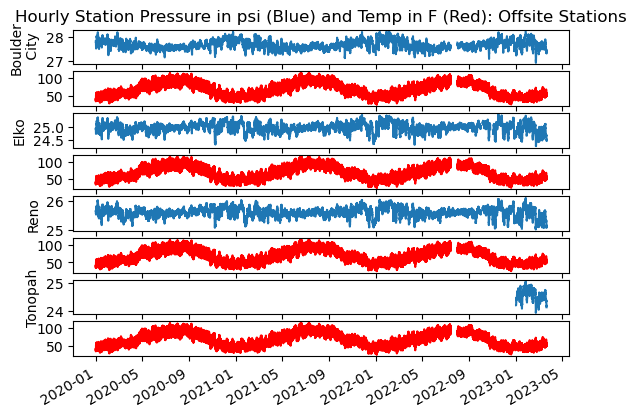

In [35]:
#%% plot NOAA data: Off-Site Barometers

# server is down but I will address the Tonopah data

fig1,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)=plt.subplots(nrows=8,ncols=1,sharex=True)
ax1.plot(baro1['HourlyStationPressure'])
ax2.plot(baro1['HourlyDryBulbTemperature'],'r-')
ax3.plot(baro2['HourlyStationPressure'])
ax4.plot(baro1['HourlyDryBulbTemperature'],'r-')
ax5.plot(baro3['HourlyStationPressure'])
ax6.plot(baro1['HourlyDryBulbTemperature'],'r-')
ax7.plot(baro4['HourlyStationPressure'])
ax8.plot(baro1['HourlyDryBulbTemperature'],'r-')
ax1.set_ylabel('Boulder\n City')
ax3.set_ylabel('Elko')
ax5.set_ylabel('Reno')
ax7.set_ylabel('Tonopah')
ax1.set_title('Hourly Station Pressure in psi (Blue) and Temp in F (Red): Offsite Stations')
plt.gcf().autofmt_xdate()

In [10]:
#%% load USGS data: raw transducer pressure

dir_data_trans = '\data\\trans-Usgs'
transnames= os.listdir(cd+dir_data_trans)
trans1 = pd.read_csv(cd+dir_data_trans+'\\'+transnames[0], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
trans2 = pd.read_csv(cd+dir_data_trans+'\\'+transnames[1], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
trans3 = pd.read_csv(cd+dir_data_trans+'\\'+transnames[2], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
trans4 = pd.read_csv(cd+dir_data_trans+'\\'+transnames[3], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
trans5 = pd.read_csv(cd+dir_data_trans+'\\'+transnames[4], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
trans6 = pd.read_csv(cd+dir_data_trans+'\\'+transnames[5], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])

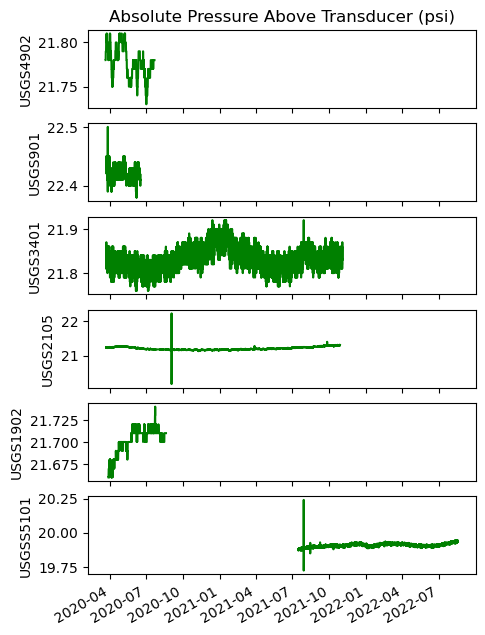

In [11]:
#%% plot USGS data: raw transducer pressure

fig2,(ax11,ax22,ax33,ax44,ax55,ax66)=plt.subplots(nrows=6,ncols=1,sharex=True,figsize = (5,8))
ax11.plot(trans1['14n'],'g-')
ax22.plot(trans2['14n'],'g-')
ax33.plot(trans3['14n'],'g-')
ax44.plot(trans4['14n'],'g-')
ax55.plot(trans5['14n'],'g-')
ax66.plot(trans6['14n'],'g-')
ax11.set_ylabel('USGS4902')
ax22.set_ylabel('USGS901')
ax33.set_ylabel('USGS3401')
ax44.set_ylabel('USGS2105')
ax55.set_ylabel('USGS1902')
ax66.set_ylabel('USGSS5101')
ax11.set_title('Absolute Pressure Above Transducer (psi)')
plt.gcf().autofmt_xdate()

In [12]:
#%% load USGS data: on-site barometers
dir_data_ontrans = '\data\\baro-Usgs'
ontransnames= os.listdir(cd+dir_data_ontrans)
ontrans1 = pd.read_csv(cd+dir_data_ontrans+'\\'+ontransnames[0], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontrans2 = pd.read_csv(cd+dir_data_ontrans+'\\'+ontransnames[1], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontrans3 = pd.read_csv(cd+dir_data_ontrans+'\\'+ontransnames[2], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontrans4 = pd.read_csv(cd+dir_data_ontrans+'\\'+ontransnames[3], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontrans5 = pd.read_csv(cd+dir_data_ontrans+'\\'+ontransnames[4], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontrans6 = pd.read_csv(cd+dir_data_ontrans+'\\'+ontransnames[5], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])

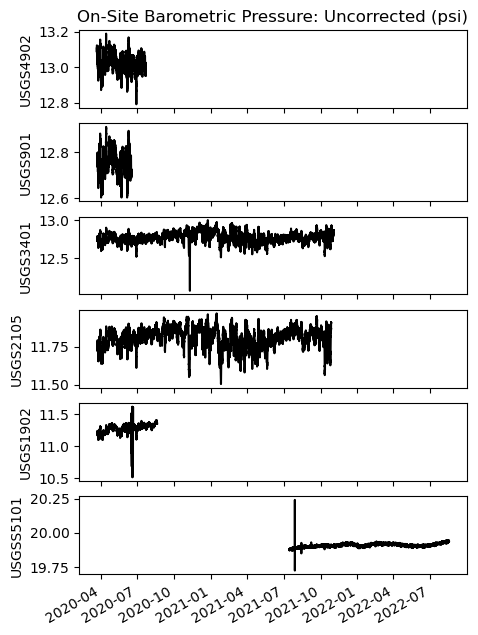

In [31]:
#%% plot USGS data: on-site barometers
fig3,(ax111,ax222,ax333,ax444,ax555,ax666)=plt.subplots(nrows=6,ncols=1,sharex=True,figsize = (5,8))
ax111.plot(ontrans1['14n'],'k-')
ax222.plot(ontrans2['14n'],'k-')
ax333.plot(ontrans3['14n'],'k-')
ax444.plot(ontrans4['14n'],'k-')
ax555.plot(ontrans5['14n'],'k-')
ax666.plot(trans6['14n'],'k-')
ax111.set_ylabel('USGS4902')
ax222.set_ylabel('USGS901')
ax333.set_ylabel('USGS3401')
ax444.set_ylabel('USGS2105')
ax555.set_ylabel('USGS1902')
ax666.set_ylabel('USGSS5101')
ax111.set_title('On-Site Barometric Pressure: Uncorrected (psi)')
plt.gcf().autofmt_xdate()


In [30]:
#%% load USGS data: on-site temperature
dir_data_ontemp = '\data\\temp-Usgs'
ontempnames= os.listdir(cd+dir_data_ontemp)
ontemp1 = pd.read_csv(cd+dir_data_ontemp+'\\'+ontempnames[0], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontemp2 = pd.read_csv(cd+dir_data_ontemp+'\\'+ontempnames[1], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontemp3 = pd.read_csv(cd+dir_data_ontemp+'\\'+ontempnames[2], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontemp4 = pd.read_csv(cd+dir_data_ontemp+'\\'+ontempnames[3], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontemp5 = pd.read_csv(cd+dir_data_ontemp+'\\'+ontempnames[4], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])
ontemp6 = pd.read_csv(cd+dir_data_ontemp+'\\'+ontempnames[5], sep='\t', parse_dates=['20d'], index_col=['20d'],       
                         na_values=['-99.9'],header=27,usecols=['20d','14n'])

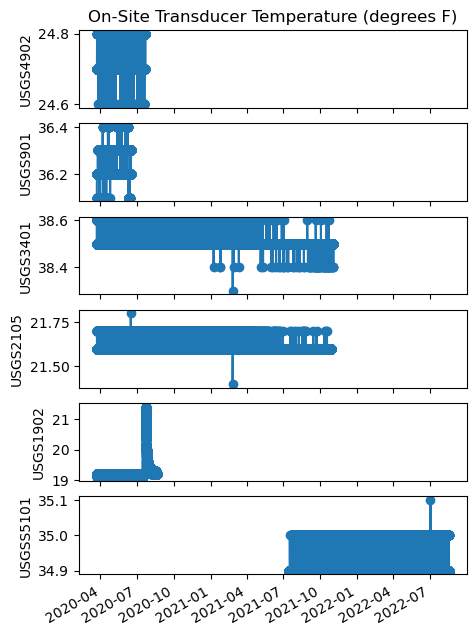

In [36]:
#%% plot USGS data: on-site barometers
fig4,(ax1111,ax2222,ax3333,ax4444,ax5555,ax6666)=plt.subplots(nrows=6,ncols=1,sharex=True,figsize = (5,8))
ax1111.plot(ontemp1['14n'],'o-')
ax2222.plot(ontemp2['14n'],'o-')
ax3333.plot(ontemp3['14n'],'o-')
ax4444.plot(ontemp4['14n'],'o-')
ax5555.plot(ontemp5['14n'],'o-')
ax6666.plot(ontemp6['14n'],'o-')
ax1111.set_ylabel('USGS4902')
ax2222.set_ylabel('USGS901')
ax3333.set_ylabel('USGS3401')
ax4444.set_ylabel('USGS2105')
ax5555.set_ylabel('USGS1902')
ax6666.set_ylabel('USGSS5101')
ax1111.set_title('On-Site Transducer Temperature (degrees F)')
plt.gcf().autofmt_xdate()

The next section of code describes the process of compensating raw pressure output with on- and off-site barometers. 

In [ ]:
# re-sample all datasets to two hour intervals

# compile DataFrames with columns for raw transducer pressure, on-site barometric pressure, and each off-site air pressure
# 1 DataFrame per monitoring location

(**PARAMETERS**) lists - values from each monitoring well for each parameter: 

wlbl_start - first USGS compensated groundwater depth below land surface at each monitoring location
time_start - datetime of first measurement 

# create columns for compensated groundwater levels below land surface from each baro record

# compensation formula - will be looped for each monitoring location and for each baro record
        #calibrates data to wlbl_start

    data['wlbl @ monloc'] = wlbl_start[monloc] + (data['raw_trans'] - data.loc(data['raw_trans'],time_Start[monloc])) - (data['baro_onsite'] - data.loc(data['baro_onsite'],time_Start[monloc]))

# useful result at this point will be one DataFrame per monitoring location (6 total) with the following columns;

    # raw_trans
    # baro_onsite
    # baro_elko
    # baro_reno
    # baro_tonopah
    # baro_bouldercity
    # wlbl_onsite                # water level below land with 'onsite' compensation
    # wlbl_elko
    # wlbl_reno
    # wlbl_tonopah
    # wlbl_bouldercity


In [3]:
# create columns with the difference between each off-site compensation result and the on-site compensation result from the same time and location

    # raw pressure transducer
    # on-site baro pressure
    # baro_elko
    # baro_reno
    # baro_tonopah
    # baro_bouldercity
    # wlbl_onsite
    # wlbl_elko
    # wlbl_reno
    # wlbl_tonopah
    # wlbl_bouldercity
    # wl_diff_elko              # difference in output between 'elko' compensation and onsite compensation
    # wl_diff_reno
    # wl_diff_tonopah
    # wl_diff_bouldercity
    
# baro_[i] columns will be dropped from monitoring well DataFrames here

In [ ]:
# add temperature from baro stations and column for calculate difference between baro temp and water temp

    # temp_elko                # temperature at 'elko' airport
    # temp_reno
    # temp_tonopah
    # temp_bouldercity
    # temp_diff_elko           # difference in temperature between 'elko' airport and monitoring location transducer
    # temp_diff_reno
    # temp_diff_tonopah
    # temp_diff_bouldercity
    # raw_trans
    # wlbl_onsite
    # wlbl_elko
    # wlbl_reno
    # wlbl_tonopah
    # wlbl_bouldercity
    # wl_diff_elko
    # wl_diff_reno
    # wl_diff_tonopah
    # wl_diff_bouldercity
    
# drop temp_[i] columns

In [ ]:
# add columns for distance from station and difference in elevation between the monitoring location and each airport

# these will be values that do not change overthe timeseries

    # dist_elko
    # dist_reno
    # dist_tonopah
    # dist_bouldercity
    
    # elev_elko
    # elev_reno
    # elev_tonopah
    # elev_bouldercity

In [ ]:
# columns reorganized for clarity (i = list of airports)

    # wl_diff_i
    # dist_i
    # elev_i
    # temp_diff_i
    # wlbl_onsite
    # baro_onsite
    # raw_trans
    # wlbl_i
    


In [ ]:
I'm unsure of the best way to get to the next partwithout creating a bunch of extra columns, 
but I want to make the following dataset for each well

4 timestamps for each line (one per airport), indexed to time, and
with corresponding values for each other parameer


    # wl_diff 
    # dist
    # elev
    # temp_diff
    # wlbl_onsite
    # raw_trans
    
NOTE: wlbl_i data will need to be preserved to make figure 6, but should not be included in this large data frame
        because it does not need to be concatenated and analyzed
    

In [ ]:
# create a DataFrame with DataFrames from each monitoring well concatenated

# sort by datetime index

In [ ]:
# (**FIGURE 3**) create stacked plot depicting output difference versus each of the other target datasets

    # output difference 
    
    # barometer distance
    # elevation difference
    # temperature dfference
    # water level below land surface
    # raw transducer pressure

In [ ]:
# perform regressions with 95% confidence intervals

In [ ]:
# (**FIGURE 4**) same as figure 3, but now with four columns of stacked plots 

# same x,y datasets: now with one column for winter data, spring plots, summer plots, and fall data

In [ ]:
# (**FIGURE 5**) stacked plot of each barometric data record vs the onsite barometer with regressions

    # baro_onsite:
    
    # baro_elko
    # baro_reno
    # baro_tonopah
    # baro_bouldercity

In [ ]:
(**FIGURE 6**) Stacked plot of hydrographs for each location - 6 total

# multiple line series per plot, depicting the on-site line in thick bright color and skinnier lines for the compensated sets

    # wlbl_onsite
    
    # wlbl_elko
    # wlbl_reno
    # wlbl_tonopah
    # wlbl_bouldercity
    
    # datetime x-axis


Discussion: The discussion section will focus on the questions below. In practice, the results will provide the opportunity for increasing the accuracy with which groundwater levels recorded in an observation well can represent aquifer groundwater levels proximal to the well, in situations where on-site barometric data is unavailable.
    
    Do any of the target parameters show a statistically significant impact on the output when using off-site air presure data for barometric compensation?
    
    Is there any seasonal variation to these impacts?
    
    Are the raw barometric records correlated to the on-site barometer?
    
    How do variations in compensation output compare with magnitudes of natural water level fluctuation in the wells?
    
    As a groundwater professional, how could you use these results and interpretations to overcome project challenges such as damaged/failed equipment or budget limitations?